Imports

In [1]:
#Import all of the necessary packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.html.widgets import interact, fixed
import ipywidgets as widgets
import io

font_plt = {'family': 'serif',
            'color':  'darkred',
            'weight': 'normal',
            'size': 10,
            }
font_plt_ax = {'family': 'serif',
               'color':  'black',
               'weight': 'normal',
               
               'size': 10,
              }
import sys
sys.path.append("../.")
import glob #glob is helpful for searching for filenames or directories
import ddm_clean as ddm #this is the module containing the differential dynamic microscopy code
import scipy #scientific python
from scipy.signal import blackmanharris as bh #for Blackman-Harris windowing
import pickle #for saving data
from scipy.special import gamma
import mpld3

C:\Users\Student\Anaconda2\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
../.\tiff_file.py:1995: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
../.\tiff_file.py:1995: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
../.\tiff_file.py:1995: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


Pick Which Videos and ROIs You Want

In [2]:
##Video 1
data_dir1 = "Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Dilute\\2018_07_09\\9.5\\2018_07_09Dilute9.5fps_3\\"
datafile ="AllResults.p"

frame_rate = 9.5
f = open(data_dir1+datafile,'rb')
AllResults = pickle.load(f)
f.close()


# data_dir2 = "Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Copolymerized\\2018_07_17\\40\\copoly40fps_2\\"
# datafile2 ="AllResultsCopoly40fps_2.p"

# frame_rate2 = 40.0
# g = open(data_dir2+datafile2,'rb')
# AllResults2 = pickle.load(g)
# g.close()


# ##Video 2
# data_dir2 = "Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Dilute\\2018_07_05\\40\\2018_07_05_Dilute40fps2_1\\"
# ##Video 3
# data_dir3 = "Z:\\ChristelleSummer2018\\Data\\BeadsInConditions\\Dilute\\2018_07_05\\40\\2018_07_05_Dilute40fps2_1\\"


Saving all at once

In [3]:
Sample0={}


In [4]:
ROIs = ['0','128','256','512','640']
for i in range(len(ROIs)):
    ROIindex = i
    ROI = ROIs[ROIindex]
    
    fitparamsA = AllResults['fitparams'+str(ROI)]
    theoryA = AllResults['theory'+str(ROI)]
    chiA = AllResults['chi2'+str(ROI)]
    
    ddmdatafile = '2018_07_09Dilute9.5fps_3_MMStack_Pos0.ome_'+str(ROI)+'_128x128_FFTDIFFS_dts_ravs.p'
    
    g = open(data_dir1+ddmdatafile,'rb')
    dat = pickle.load(g)
    g.close()

    # dat = pickle.load(open(DDMdata_dir1+ddmdatafile,'r'))
    Sample0['dts'+ROIs[i]]  = dat['dts']
    Sample0['ravs'+ROIs[i]] = dat['ravs']
    Sample0['ffts'+ROIs[i]] = dat['ffts']
    Sample0['times'+ROIs[i]]= dat['dts']/frame_rate
    
    
    

In [5]:
pickle.dump(Sample0, open(data_dir1+ '\\RavsForFits.p', 'wb'))

In [ ]:
a = open(data_dir1+'\\RavsForFits.p','rb')
Sample0 = pickle.load(a)
a.close()

In [39]:
q_index =15

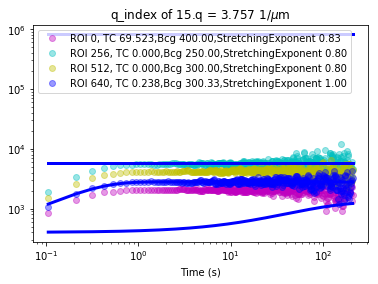

In [40]:
# mpld3.disable_notebook()
# %matplotlib qt5
ROIs = [0,256,512,640]
col = ['mo','co','yo','bo','go','ko']
imDimension= 128
px = .196
q = np.arange(0,imDimension/2)*2*np.pi*(1./(imDimension*px))
for i in range(len(ROIs)):
    ROI = ROIs[i]
    fitparamsA = AllResults['fitparams'+str(ROI)]
    theoryA = AllResults['theory'+str(ROI)]
    chiA = AllResults['chi2'+str(ROI)]
    
    times = Sample0['times'+str(ROIs[i])]
    ravs= Sample0['ravs'+str(ROIs[i])]
  
    
    plt.loglog(times,ravs[:,q_index],col[i],alpha=0.4, label = 'ROI %i, TC %.3f,Bcg %.2f,StretchingExponent %.2f'
               %(ROIs[i], fitparamsA[q_index][1], fitparamsA[q_index][2] ,fitparamsA[q_index][3] ))
    plt.loglog(times[:len(theoryA[q_index,:])], theoryA[q_index,:], '-b',lw=3)
plt.title('q_index of %i.q = %.3f 1/$\mu$m' %(q_index, q[q_index]))
plt.xlabel("Time (s)")
plt.legend()


    

In [73]:
for i in range(0,63):
    if (AllResults['fitparams256'][i][0]== 0.0 and i>0):
        print i


27
28
29
32
35
36
37
38
39
40
41
44
45
47
49
50
56


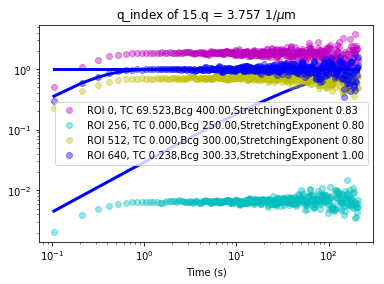

In [41]:
# mpld3.disable_notebook()
# %matplotlib qt5
ROIs = [0,256,512,640]
col = ['mo','co','yo','bo','go','ko']
imDimension= 128
px = .196
q = np.arange(0,imDimension/2)*2*np.pi*(1./(imDimension*px))
for i in range(len(ROIs)):
    ROI = ROIs[i]
    fitparamsA = AllResults['fitparams'+str(ROI)]
    theoryA = AllResults['theory'+str(ROI)]
    chiA = AllResults['chi2'+str(ROI)]
    
    times = Sample0['times'+str(ROIs[i])]
    ravs= Sample0['ravs'+str(ROIs[i])]
    adjustedravs = (ravs[:,q_index]-fitparamsA[q_index][2])/fitparamsA[q_index][0]
    adjustedtheoryA = (theoryA-fitparamsA[q_index][2])/fitparamsA[q_index][0]
    
    plt.loglog(times,adjustedravs,col[i],alpha=0.4, label = 'ROI %i, TC %.3f,Bcg %.2f,StretchingExponent %.2f'
               %(ROIs[i], fitparamsA[q_index][1], fitparamsA[q_index][2] ,fitparamsA[q_index][3] ))
    
    plt.loglog(times[:len(adjustedtheoryA[q_index,:])], adjustedtheoryA[q_index,:], '-b',lw=3)
    
plt.title('q_index of %i.q = %.3f 1/$\mu$m' %(q_index, q[q_index]))
plt.xlabel("Time (s)")
plt.legend()
